## 서울 중심 관광지 클러스터링

- 해당 분석은 한국관광데이터랩에서 제공하고 있는 서울특별시 중심관광지 데이터를 대상으로 함 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import folium

In [20]:
#glob()로 부산 중심관광지 데이터 불러오기
file_names = glob("./중심관광지/서울 중심관광지/*.csv")
seoul_poi = pd.DataFrame() 


for file_name in file_names:
    poi = pd.read_csv(file_name, encoding = "EUC-KR")

    seoul_poi = pd.concat([seoul_poi, poi])


seoul_poi

,중심 POI X 좌표,중심 POI Y 좌표,중심시도명,중심시군구명,중심관광지명,Unnamed: 5,중심카테고리 명_대,중심카테고리 명_중,순위
0,126.9282,37.5260,서울특별시,영등포구,더현대/서울,서울 영등포구 여의대로 108-0,관광지,쇼핑,1
1,126.9282,37.5310,서울특별시,영등포구,여의도한강공원,서울 영등포구 여의동로 330-0,관광지,문화관광,2
2,126.9034,37.5172,서울특별시,영등포구,타임스퀘어,서울 영등포구 영중로 15-0,관광지,쇼핑,3
3,126.9254,37.5254,서울특별시,영등포구,IFC몰,서울 영등포구 국제금융로 10-0,관광지,쇼핑,4
4,126.8921,37.5276,서울특별시,영등포구,코스트코홀세일/양평점,서울 영등포구 선유로 156-0,관광지,쇼핑,5
...,...,...,...,...,...,...,...,...,...
95,127.0363,37.6381,서울특별시,도봉구,장미어린이공원,서울 도봉구,관광지,문화관광,96
96,127.0369,37.6635,서울특별시,도봉구,소망어린이공원,서울 도봉구,관광지,문화관광,97
97,127.0388,37.6896,서울특별시,도봉구,내자사,서울 도봉구 도봉로191길 88-94,관광지,역사관광,98
98,127.0371,37.6673,서울특별시,도봉구,개나리어린이공원,서울 도봉구,관광지,문화관광,99


In [22]:
# 칼럼 정리

# 필요한 칼럼만 추출
seoul_poi = seoul_poi.drop(seoul_poi.columns[[5]],axis = 1)

# 칼럼 이름 정리
seoul_poi.rename(columns = {'중심 POI X 좌표' : 'longitude','중심 POI Y 좌표' : 'latitude'}, inplace = True)

#결과 확인 
seoul_poi

,longitude,latitude,중심시도명,중심시군구명,중심관광지명,중심카테고리 명_대,중심카테고리 명_중,순위
0,126.9282,37.5260,서울특별시,영등포구,더현대/서울,관광지,쇼핑,1
1,126.9282,37.5310,서울특별시,영등포구,여의도한강공원,관광지,문화관광,2
2,126.9034,37.5172,서울특별시,영등포구,타임스퀘어,관광지,쇼핑,3
3,126.9254,37.5254,서울특별시,영등포구,IFC몰,관광지,쇼핑,4
4,126.8921,37.5276,서울특별시,영등포구,코스트코홀세일/양평점,관광지,쇼핑,5
...,...,...,...,...,...,...,...,...
95,127.0363,37.6381,서울특별시,도봉구,장미어린이공원,관광지,문화관광,96
96,127.0369,37.6635,서울특별시,도봉구,소망어린이공원,관광지,문화관광,97
97,127.0388,37.6896,서울특별시,도봉구,내자사,관광지,역사관광,98
98,127.0371,37.6673,서울특별시,도봉구,개나리어린이공원,관광지,문화관광,99


In [23]:
#기술통계량 확인

seoul_poi.describe()

,longitude,latitude,순위
count,1900.000000,1900.000000,1900.000000
mean,126.992996,37.552139,50.500000
std,0.071042,0.055276,28.873669
min,126.817300,37.433700,1.000000
25%,126.930175,37.508900,25.750000
50%,126.995500,37.552500,50.500000
75%,127.050475,37.588975,75.250000
max,127.153300,37.700500,100.000000


In [24]:
#카테고리(대), 카테고리(중) 카테고리별 개수 파악

print(seoul_poi['중심카테고리 명_대'].value_counts())
print(seoul_poi['중심카테고리 명_중'].value_counts())

관광지    1313
숙박      587
Name: 중심카테고리 명_대, dtype: int64
문화관광     730
숙박       587
쇼핑       334
역사관광     123
레저스포츠     44
기타관광      39
자연관광      38
체험관광       5
Name: 중심카테고리 명_중, dtype: int64


In [33]:
#문화관광 카테고리 해석
culture = seoul_poi.loc[seoul_poi['중심카테고리 명_중']=='문화관광']
culture.describe()

,longitude,latitude,순위
count,730.000000,730.00000,730.000000
mean,126.995430,37.55504,54.690411
std,0.071863,0.05513,28.297897
min,126.817300,37.43370,1.000000
25%,126.930425,37.51380,31.000000
50%,127.001050,37.55170,58.000000
75%,127.054400,37.58840,79.000000
max,127.153300,37.69180,100.000000


/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='순위', ylabel='Density'>

/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)


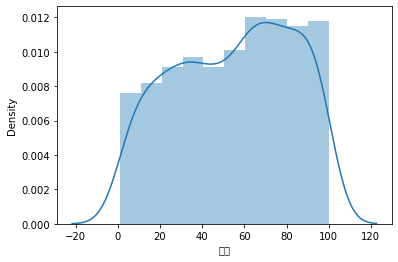

In [34]:
#문화관광 카테고리 중심성 분포 시각화

sns.distplot(culture['순위'])

In [35]:
#숙박 카테고리 해석
accom = seoul_poi.loc[seoul_poi['중심카테고리 명_중']=='숙박']
accom.describe()

,longitude,latitude,순위
count,587.000000,587.000000,587.000000
mean,126.988667,37.542680,52.366269
std,0.069769,0.049083,27.185316
min,126.831000,37.446100,2.000000
25%,126.929300,37.502950,29.000000
50%,126.987900,37.545400,50.000000
75%,127.044400,37.569250,77.000000
max,127.123900,37.685100,100.000000


/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='순위', ylabel='Density'>

/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)


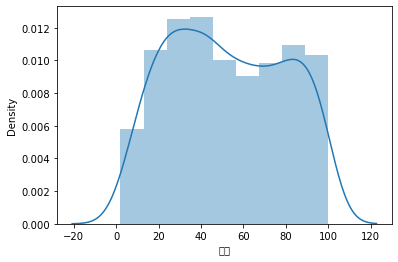

In [36]:
#숙박 카테고리 중심성 분포 시각화

sns.distplot(accom['순위'])

In [38]:
#쇼핑 카테고리 해석
shopping = seoul_poi.loc[seoul_poi['중심카테고리 명_중']=='쇼핑']
shopping.describe()

,longitude,latitude,순위
count,334.000000,334.000000,334.000000
mean,126.994550,37.546963,33.425150
std,0.073950,0.054361,27.501877
min,126.843500,37.440100,1.000000
25%,126.923475,37.501625,9.000000
50%,127.007450,37.545800,28.000000
75%,127.059675,37.580300,51.750000
max,127.150200,37.684100,100.000000


/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='순위', ylabel='Density'>

/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)


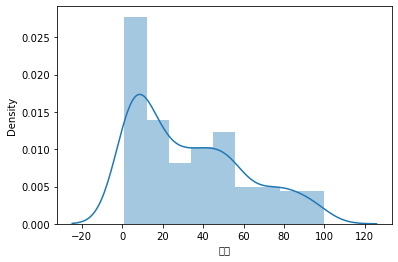

In [39]:
#쇼핑 카테고리 중심성 분포 시각화

sns.distplot(shopping['순위'])

In [40]:
#역사관광 카테고리 해석
history = seoul_poi.loc[seoul_poi['중심카테고리 명_중']=='역사관광']
history.describe()

,longitude,latitude,순위
count,123.000000,123.000000,123.000000
mean,126.997207,37.577763,58.113821
std,0.061252,0.062692,30.124116
min,126.822600,37.452500,1.000000
25%,126.955500,37.536650,28.000000
50%,126.999400,37.590800,66.000000
75%,127.037150,37.611100,84.000000
max,127.118800,37.689600,100.000000


/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='순위', ylabel='Density'>

/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hyorimlightyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)


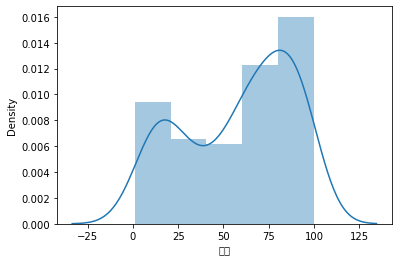

In [41]:
#역사관광 카테고리 중심성 분포 시각화

sns.distplot(history['순위'])

In [12]:
# coord -> list

poi_locations = seoul_poi[['latitude', 'longitude']]
poi_coord_list = poi_locations.values.tolist()
poi_coord_list

[[37.526, 126.9282],
 [37.531, 126.9282],
 [37.5172, 126.9034],
 [37.5254, 126.9254],
 [37.5276, 126.8921],
 [37.5157, 126.9073],
 [37.5254, 126.9266],
 [37.5171, 126.9056],
 [37.5182, 126.8958],
 [37.5274, 126.9172],
 [37.526, 126.8916],
 [37.5278, 126.9046],
 [37.5437, 126.8996],
 [37.5166, 126.9032],
 [37.5252, 126.9291],
 [37.5169, 126.9093],
 [37.5185, 126.9265],
 [37.5413, 126.8981],
 [37.5213, 126.9184],
 [37.5302, 126.9219],
 [37.517, 126.894],
 [37.5207, 126.9269],
 [37.5171, 126.9036],
 [37.5257, 126.9383],
 [37.525, 126.9259],
 [37.5194, 126.9397],
 [37.5162, 126.9083],
 [37.5174, 126.9043],
 [37.5111, 126.9175],
 [37.522, 126.9009],
 [37.5203, 126.9069],
 [37.5384, 126.8933],
 [37.5183, 126.9106],
 [37.5348, 126.9115],
 [37.4959, 126.9079],
 [37.5303, 126.9205],
 [37.4911, 126.8992],
 [37.5152, 126.9108],
 [37.5181, 126.9103],
 [37.5256, 126.9031],
 [37.5302, 126.9206],
 [37.5322, 126.9207],
 [37.5174, 126.909],
 [37.5291, 126.9248],
 [37.5259, 126.9221],
 [37.5178, 126.907

In [49]:
#poi 맵핑
#126.992996	37.552139

map = folium.Map(location=[37.552139,126.992996], zoom_start=12)
for coord in poi_coord_list:
    folium.CircleMarker(coord,
                        radius=8,
                        color='b',
                        fill_color="blue",
                        popup="CircleMarker popup",
                        tooltip="CircleMarker tooltip",).add_to(map)

map

In [48]:
# 중심관광지 히트맵 시각화

from folium.plugins import HeatMap, HeatMapWithTime

#hot_spot 데이터 히트맵으로 시각화

map_hm = folium.Map(location=[37.552139,126.992996],
                    zoom_start = 12) 
seoul_poi['latitude'] = seoul_poi['latitude'].astype(float) #float형태 변환 
seoul_poi['longitude'] = seoul_poi['longitude'].astype(float)
poi_coord = seoul_poi[['latitude', 'longitude']]

#지도에 추가
HeatMap(poi_coord,gradient={0.2: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25).add_to(map_hm)

#확인 
map_hm

## 클러스터링

In [60]:
from sklearn.cluster import DBSCAN

#부산 중심관광지와 동일한 조건으로 중심관광지를 클러스터링 함
db_df =seoul_poi[['longitude', 'latitude']]
db = DBSCAN(eps=0.005, min_samples=7, metric='euclidean').fit(db_df)
labels = db.labels_

poi_coord['cluster'] = labels

print(poi_coord['cluster'].unique())
poi_coord

[ 0  1 -1  2  3 37  4  6  5  7  8  9 10 11 12 13 17 16 14 15 18 19 22 20
 21 23 24 25 43 26 27 28 29 31 30 33 32 34 35 36 38 40 39 41 42 44 45 46
 47 51 52 48 49 50 53 54 55 56]


<ipython-input-60-09feaa92fee2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poi_coord['cluster'] = labels


,latitude,longitude,cluster
0,37.5260,126.9282,0
1,37.5310,126.9282,0
2,37.5172,126.9034,1
3,37.5254,126.9254,0
4,37.5276,126.8921,-1
...,...,...,...
95,37.6381,127.0363,51
96,37.6635,127.0369,52
97,37.6896,127.0388,53
98,37.6673,127.0371,-1


In [61]:
#dbscan 결과값을 통해 불리언 생성, outlier = False로 변경

core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True

In [62]:
# dbscan 성능평가

n_clusters_ = len(set(labels)) - ( 1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('# of clusters->', n_clusters_)
print('noise count->', n_noise)

# of clusters-> 57
noise count-> 634


In [64]:
# 데이터프레임 정리 후 seoul_poi 데이터프레임과 합치기 

df = poi_coord['cluster']
new_df = pd.concat([seoul_poi,df],axis=1)
new_df

,longitude,latitude,중심시도명,중심시군구명,중심관광지명,중심카테고리 명_대,중심카테고리 명_중,순위,cluster
0,126.9282,37.5260,서울특별시,영등포구,더현대/서울,관광지,쇼핑,1,0
1,126.9282,37.5310,서울특별시,영등포구,여의도한강공원,관광지,문화관광,2,0
2,126.9034,37.5172,서울특별시,영등포구,타임스퀘어,관광지,쇼핑,3,1
3,126.9254,37.5254,서울특별시,영등포구,IFC몰,관광지,쇼핑,4,0
4,126.8921,37.5276,서울특별시,영등포구,코스트코홀세일/양평점,관광지,쇼핑,5,-1
...,...,...,...,...,...,...,...,...,...
95,127.0363,37.6381,서울특별시,도봉구,장미어린이공원,관광지,문화관광,96,51
96,127.0369,37.6635,서울특별시,도봉구,소망어린이공원,관광지,문화관광,97,52
97,127.0388,37.6896,서울특별시,도봉구,내자사,관광지,역사관광,98,53
98,127.0371,37.6673,서울특별시,도봉구,개나리어린이공원,관광지,문화관광,99,-1


In [65]:
new_df.to_csv('./중심관광지/서울 중심관광지/seoul_cluster.csv')